# Final Exam project submission

## Uncovering Insights: A Data-driven Analysis & Visualization of Boston's Housing Market

## Boston House Price Dataset (housing values in suburbs of Boston)

## Team: Lewis Yung and Joe Fernandez

## Course: COMPSCIX433.3-023

## Project Description

In this project we are going to use concepts learned in **COMPSCIX433.3-023 Data Analysis and Scientific Computing** on the house prices in the suburbs of Boston, Massachusetts US. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. This data is shared on Kaggle and was originally taken from the UCI Machine Learning Repository. Each record in the database describes the house prices in the Boston suburbs. There are 14 attributes that provide relevant information concerning housing values in the suburbs of Boston.

There are 13 continuous attributes (including "class" attribute "MEDV"), and 1 binary-valued attribute. The attributes are:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000\(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - lower status of the population \(%)
- MEDV - Median value of owner-occupied homes in \$1000's

**Original dataset from UCI website:** https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

**Data on Kaggle.com we will use for Data Analysis:** https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

## Exploratory Data Analysis (EDA)
> EDA is the process of figuring out what the data can tell us and we use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis. 

## Topics covered in this project:

> ### Data Exploration
> ### Box Plot
> ### Histogram
> ### Pairwise Correlation Map
> ### Cluster Map
> ### Pearson Correlation Map

### First we will import all the necessary Python Packages. We will use:
> Numpy, Pandas, PyPlot from Matplotlib and Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The input file from Kaggle looks like this.

` 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00`\
` 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60`\
` 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70`\
` 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40`

We will use Pandas `read_fwf` (Fixed Width File) module to read the file.\
Alternatively, we can use Pandas `read_csv` with `delimiter=r"\s+"` to use regex to look for spaces and split columns

In [2]:
column_specs =[(0,9), (9,16), (16,24),(24,27),(27,35),(35,43),(43,50),
               (50,58),(58,62),(62,69),(69,76),(76,83),(83,90),(90,97)]

In [3]:
col_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [4]:
DF = pd.read_fwf('BostonHousing.data',colspecs=column_specs, header=None, index=None, names=col_names)

#Alternate, we can also use regex `\s+` to strip based on spaces
#DFF = pd.read_csv('BostonHousing.data', header=None, delimiter=r"\s+", index_col=None, names=col_names)

Let's explore the contents of the Boston Housing Dataset

In [5]:
DF.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


Let's perform some basic profiling on the Pandas Dataframe using `pandas.info()` and `pandas.describe()`\
This will give us the statistics of NULL values and the statistical information about each column in the dataframe

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
DF.shape

(506, 14)

In [9]:
DF.size

7084

In [10]:
len(DF)

506

*We have 506 rows and 14 columns of data. All data elements are numeric (integer and float)*

Let's explore the data and do a boxplot of each of the columns

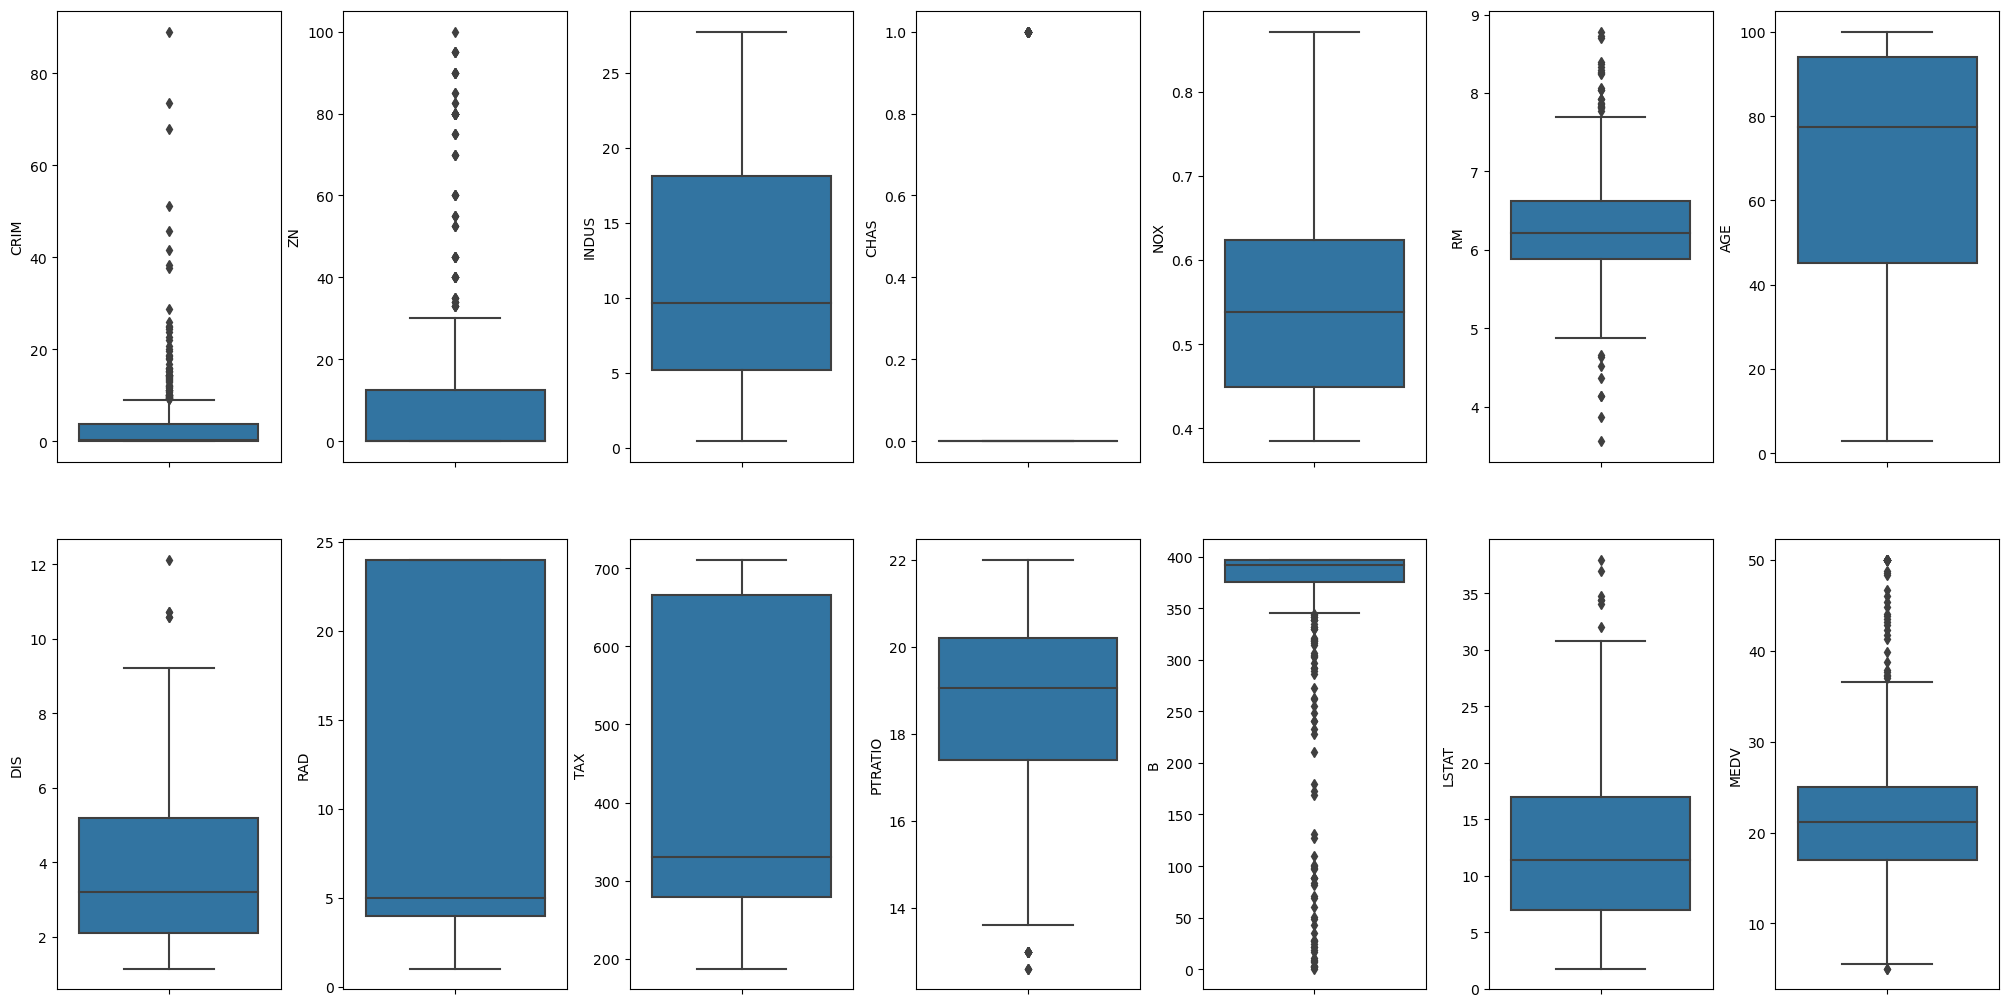

In [11]:
# We have 14 columns. So let's split them into two rows of 7 columns to display the boxplot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in DF.items():
    sns.boxplot(y=k, data=DF, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

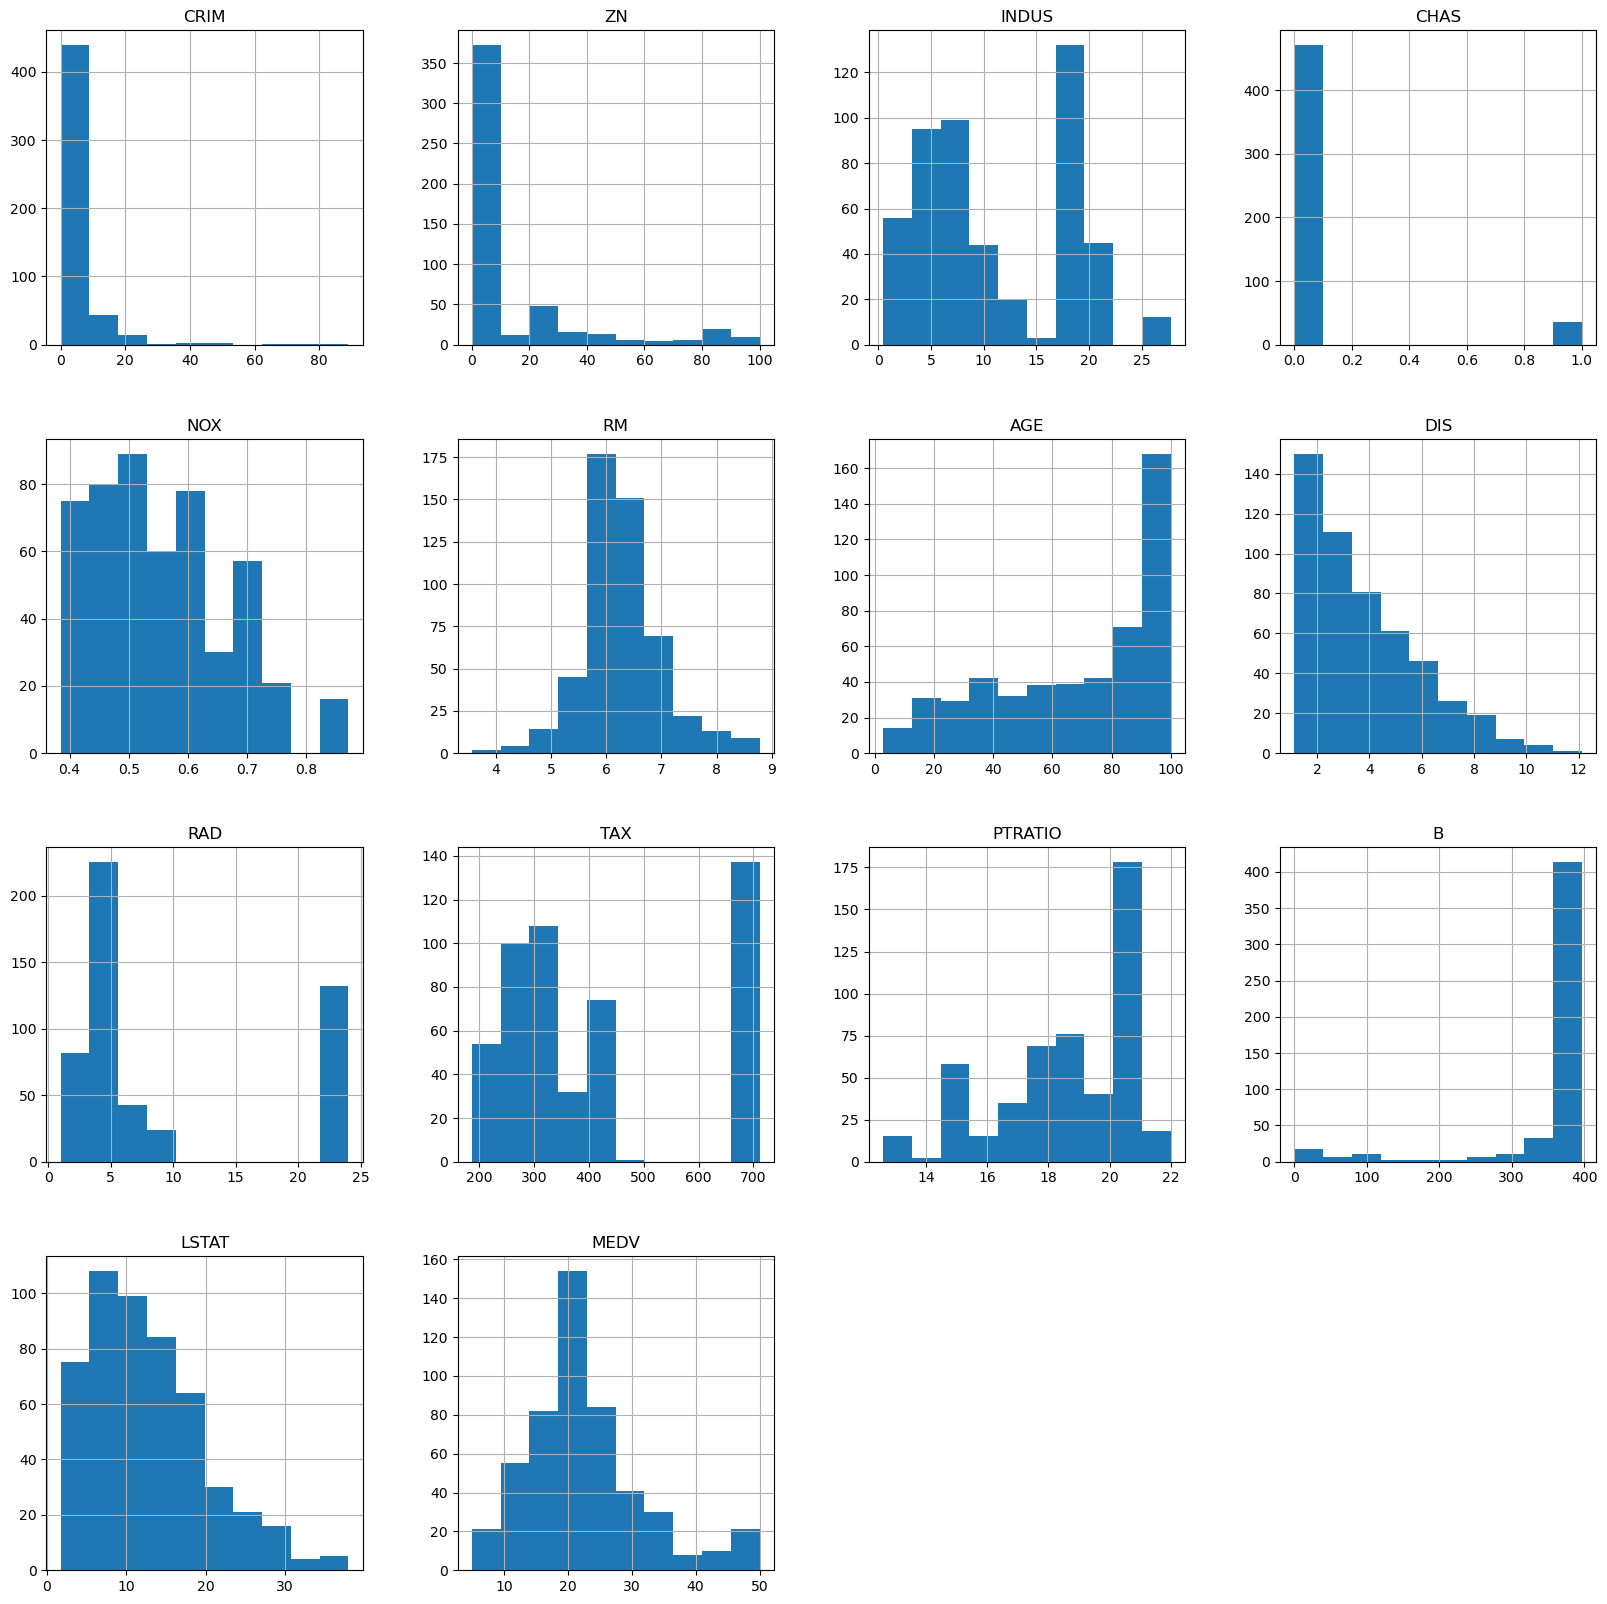

In [12]:
# We can also do a histogram of the data to see the statistical info
DF.hist(figsize = (20,20))
plt.show()

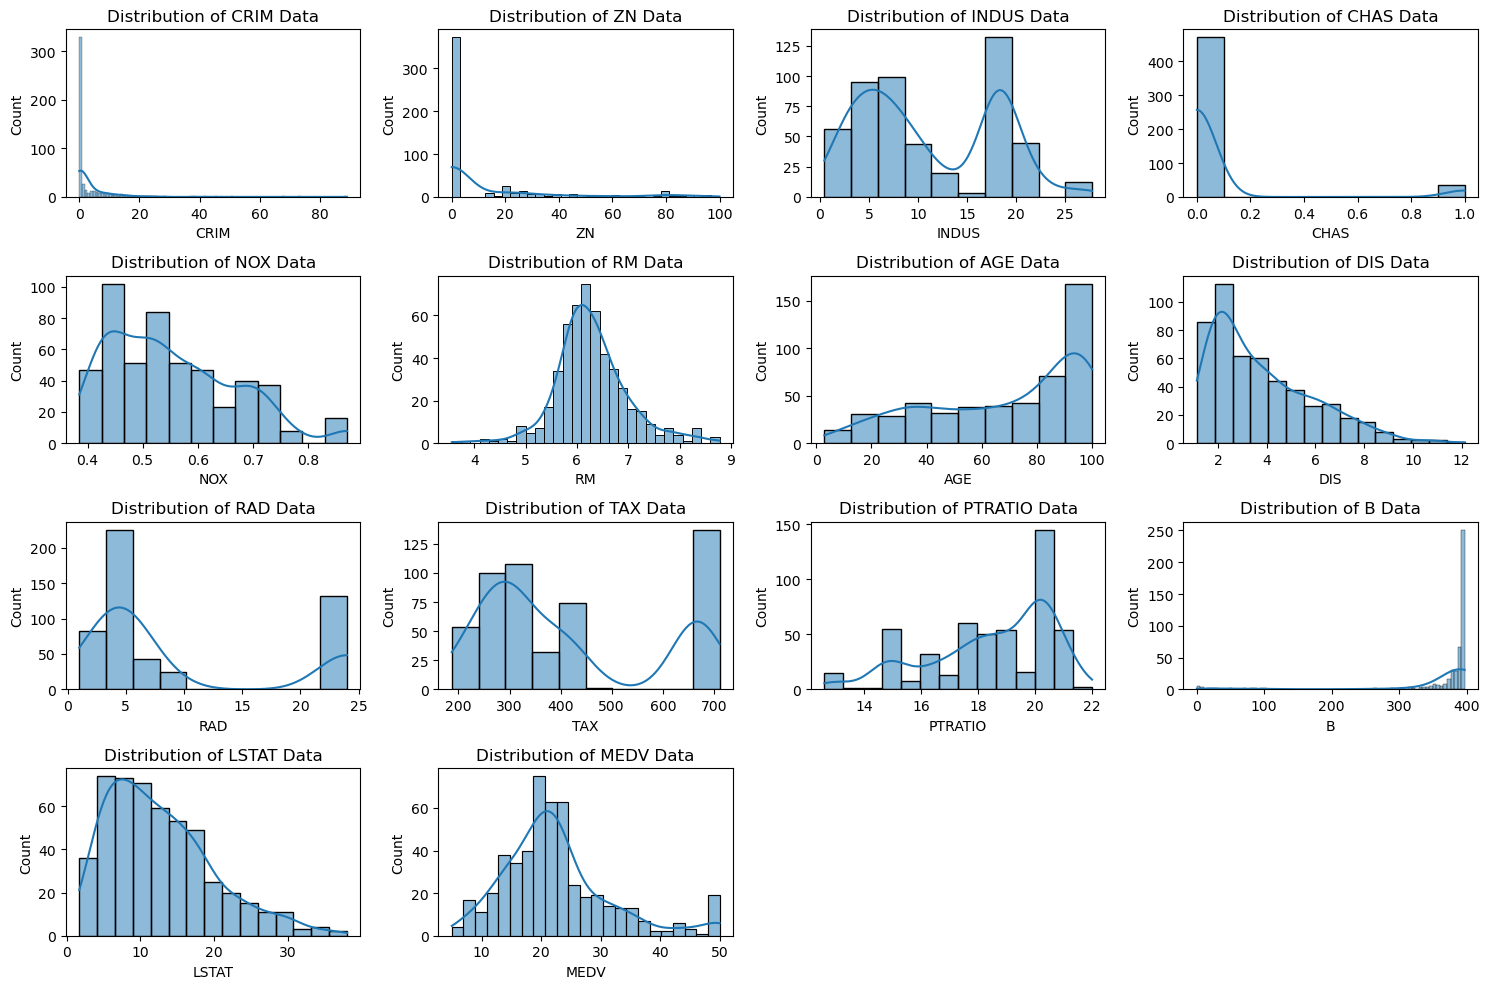

In [13]:
# Let's plot the distribution grap and look at the skewness of the feature using the Kernel Density Estimate (kde)
# We have 14 features. Let's plot them on a 4x4 subplot

plt.figure(figsize=(15,10))
for i,col in enumerate(DF.columns,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(DF[col],kde=True)
    plt.tight_layout()
    plt.plot()

Columns RM and MEDV show relatively normal symmetric distribution.\
Columns INDUS, RAD, and TAX show double peak (bimodal) distribution.\
Columns CRIM, ZN, NOX, DIS, LSTAT show a skewed right distribution.\
Columns PTRATIO and B show a skewed left distribution.

A distribution is called skewed left if, as in the histogram above, the left tail (smaller values) is much longer than the right tail (larger values). Note that in a skewed left distribution, the bulk of the observations are medium/large, with a few observations that are much smaller than the rest.

A distribution is called skewed right if, as in the histogram above, the right tail (larger values) is much longer than the left tail (small values). Note that in a skewed right distribution, the bulk of the observations are small/medium, with a few observations that are much larger than the rest.

In [14]:
print('Total # of ZN   rows equals to ZERO:', DF.ZN.eq(0).sum())
print('Total # of CHAS rows equals to ZERO:', DF.CHAS.eq(0).sum())
print('Total # of RAD  rows betweeen 4 & 5:', DF.RAD.between(4,5).sum())
print('Total # of RAD  rows equals to   24:', DF.RAD.eq(24).sum())

Total # of ZN   rows equals to ZERO: 372
Total # of CHAS rows equals to ZERO: 471
Total # of RAD  rows betweeen 4 & 5: 225
Total # of RAD  rows equals to   24: 132


We can find some interesting observations from the statistical information and boxplot.

1. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
> This shows that the data is primarily a categorical value but represented as a number\
> Most of the values are 0 with very few as 1 (471 of 506 are ZEROs).

2. ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)
> The 25% and 50% quartile values are zero. Histogram shows that most values are zero (372 of 506 are 0).

3. Columns CRIM, ZN, CHAS, RM, B, and MEDV seems to have outliers. Lets explore this further

#### *Let's look at the outliners for each of the columns*


In [15]:
# Let's look at the outliners for each of the columns
# Using the Interquartile Rule to Find Outliers
# Step 1: Calculate the interquartile range for the data.
# Step 2: Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
# Step 3: Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
# Step 4: Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.
# Step 5: If the values are between Step 3 & Step 4, count them as outliers
# Step 6: Find out what % of Step 5 is an outliner from the total number of rows for each column
# Step 7: Print the % of outliers for each of the columns

len_DF = DF.shape[0]

outliers = []

for k, v in DF.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / len_DF
    outliers.append(round(perc,2))
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [16]:
# Let's create a dataframe of the outliers. Then sort them in descending order of the outliers

df_outliers = pd.DataFrame(outliers,columns = ['outliers'],index=col_names)
df_outliers.sort_index(inplace=True)
df_outliers.sort_values(by='outliers',ascending=False, na_position='first',inplace=True)
df_outliers

,outliers
CHAS,100.00
B,15.22
ZN,13.44
CRIM,13.04
MEDV,7.91
RM,5.93
PTRATIO,2.96
LSTAT,1.38
DIS,0.99
AGE,0.00


[Text(0, 0, '100'),
 Text(0, 0, '15.22'),
 Text(0, 0, '13.44'),
 Text(0, 0, '13.04'),
 Text(0, 0, '7.91'),
 Text(0, 0, '5.93'),
 Text(0, 0, '2.96'),
 Text(0, 0, '1.38'),
 Text(0, 0, '0.99'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

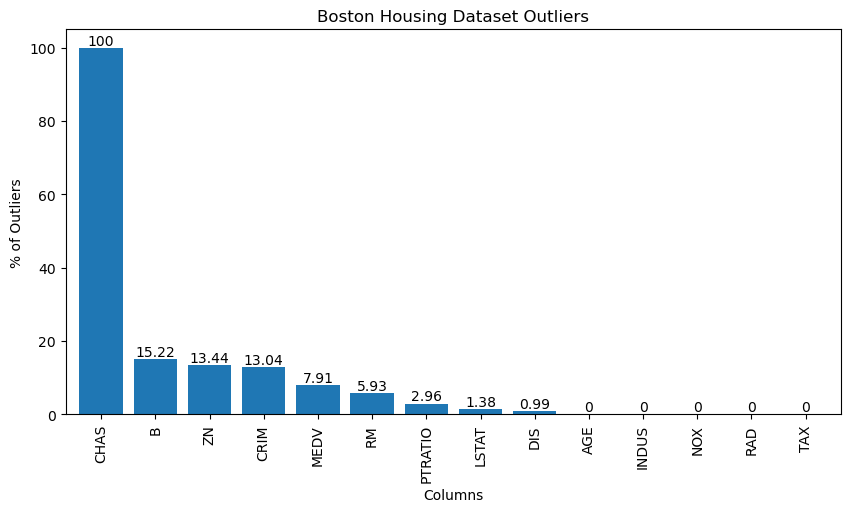

In [17]:
# Let's plot the bar-graph of the outliers for each column

ax_out = df_outliers.plot(kind='bar', #bar for vertical, barh for horizontal
               figsize=(10, 5),  #figure size width, height in inches
               #color='darkblue', #red, blue, yellow, green, purple, orange, grey, black, maroon + (dark / light prefix)
                               #A single color string referred to by name, RGB or RGBA code
               title='Boston Housing Dataset Outliers', #Title of the chart
               xlabel='Columns',         #x label
               ylabel='% of Outliers',   #y label
               width=0.8,
               legend=None,
               label=True)        #prit legends
#ax_out.legend(bbox_to_anchor=(1, 1), loc='best') #for reference to show how to print legend
ax_out.bar_label(ax_out.containers[0], label_type='edge',color='black')

#### *Let's look at pairwise correlation between each of the columns*

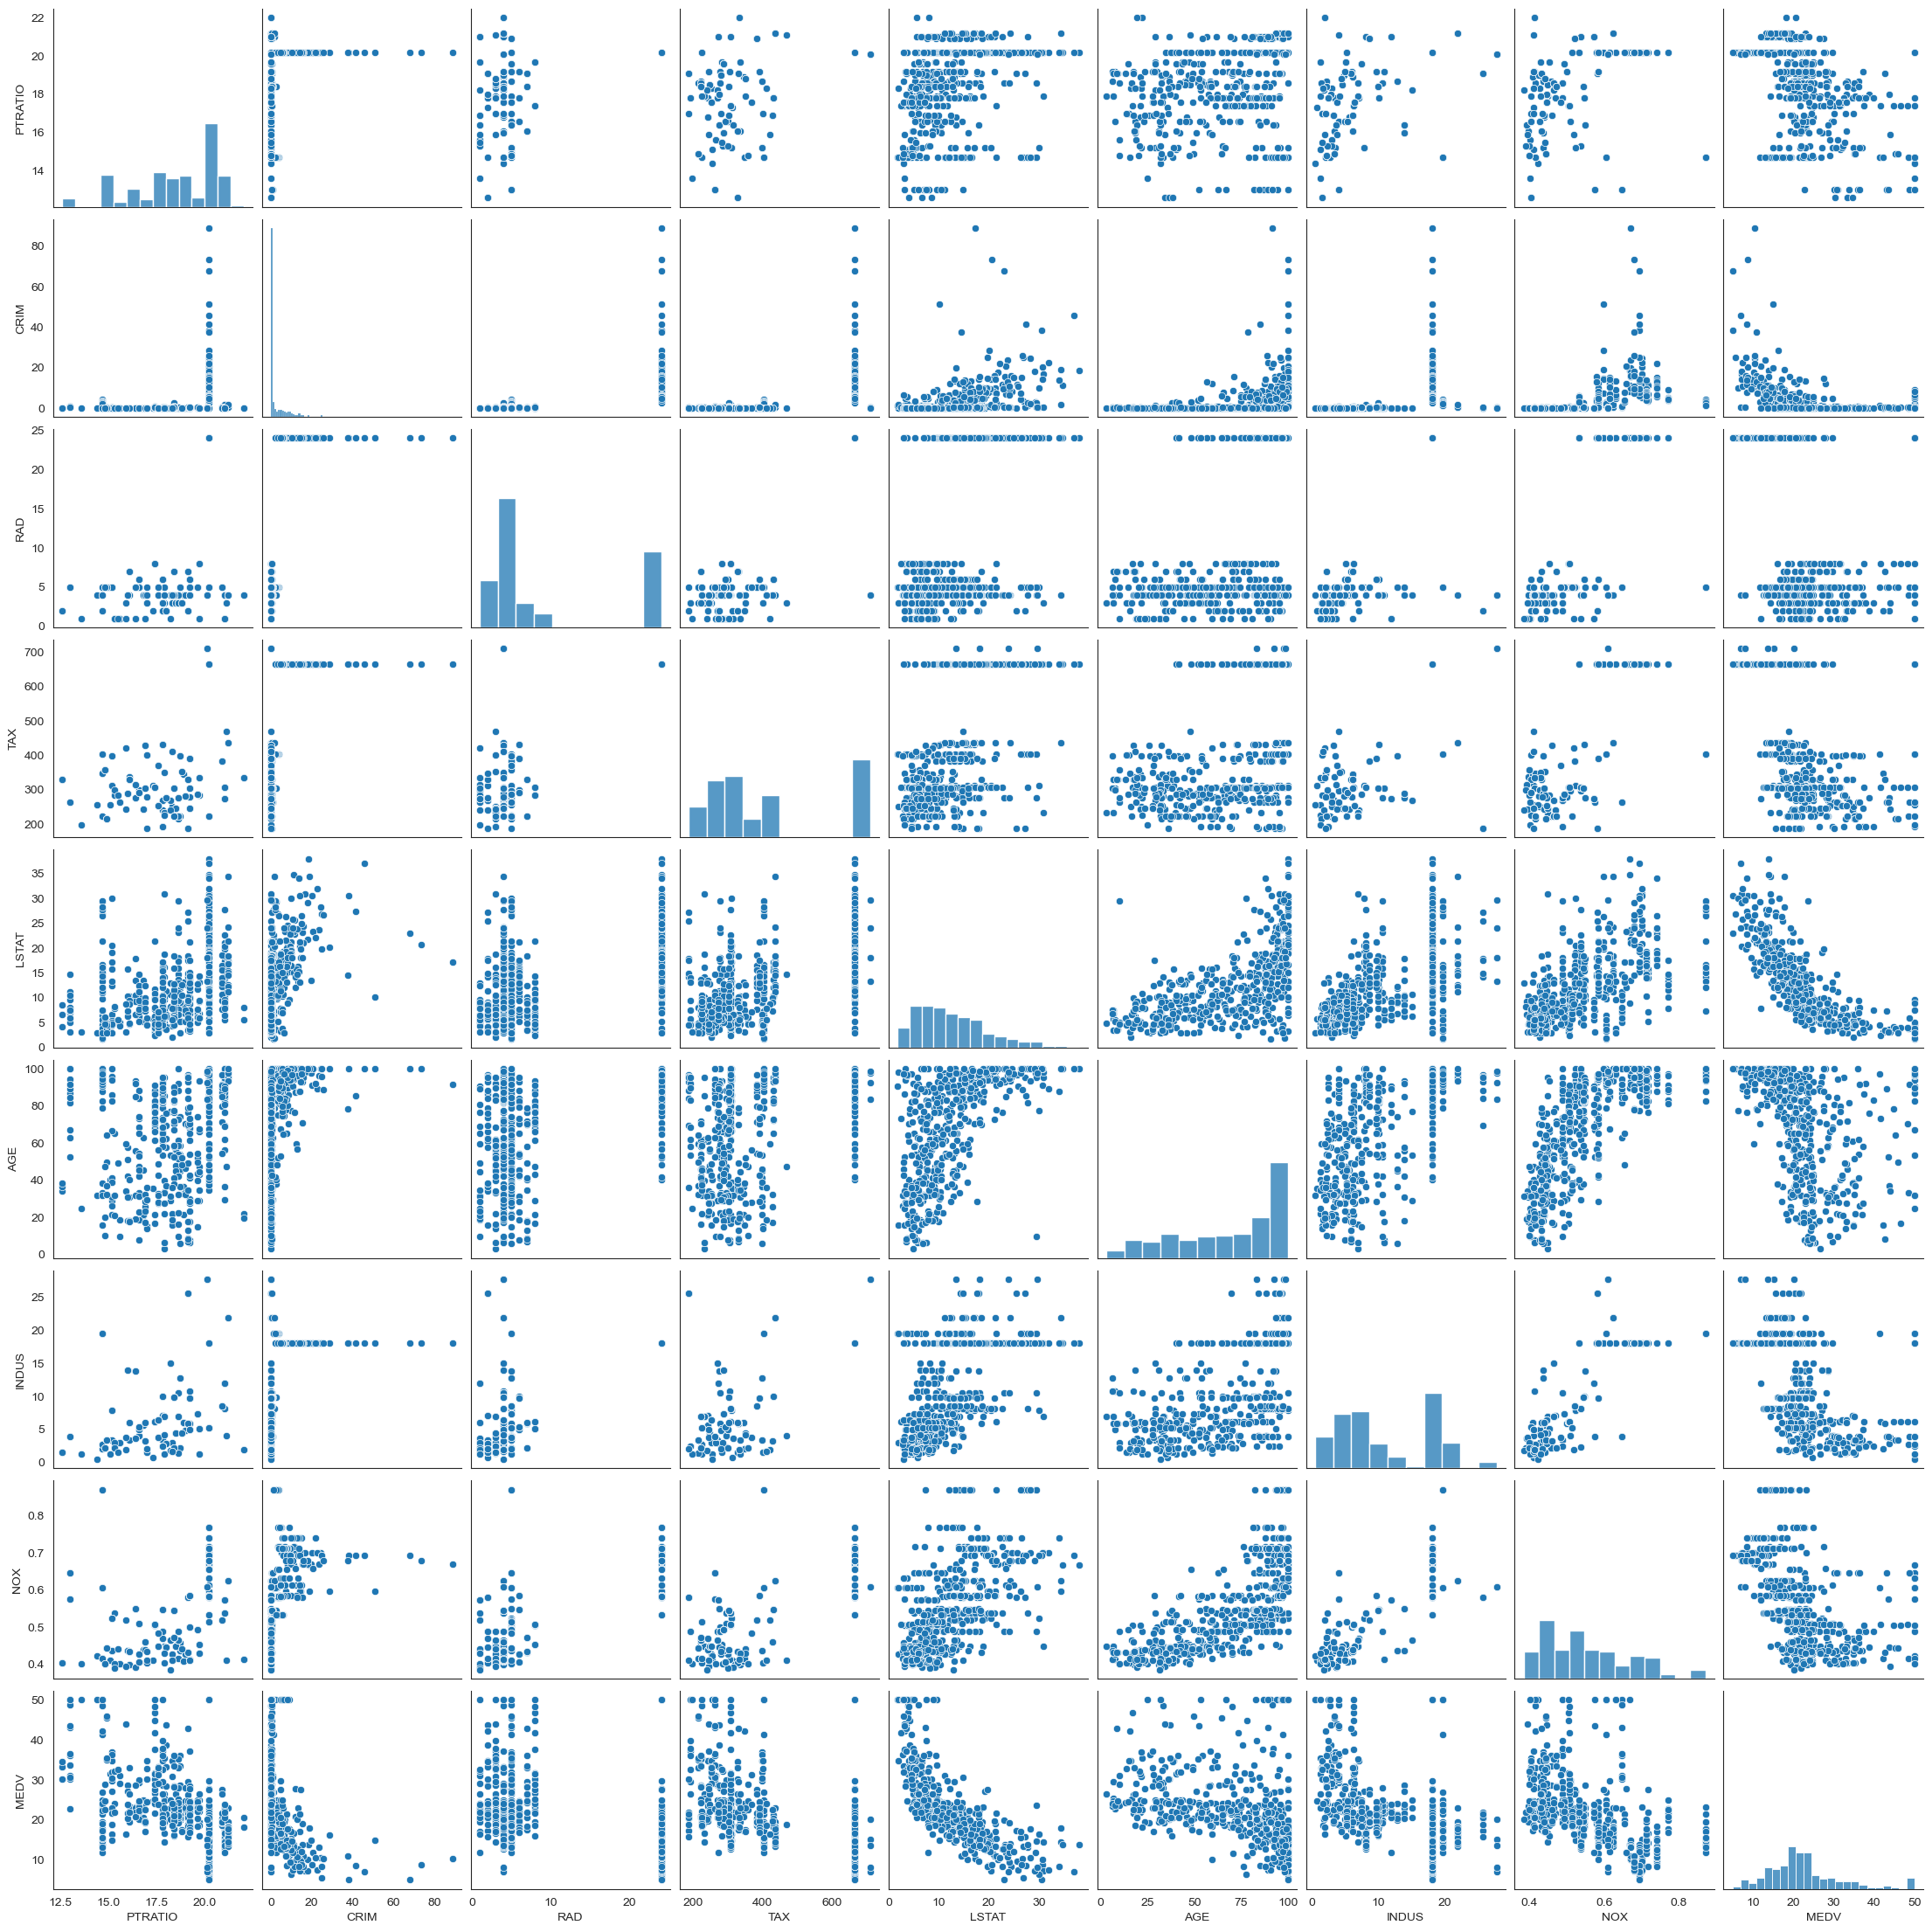

In [25]:
sns.pairplot(DF[['PTRATIO','CRIM','RAD','TAX','LSTAT','AGE','INDUS','NOX','MEDV']])
plt.show()

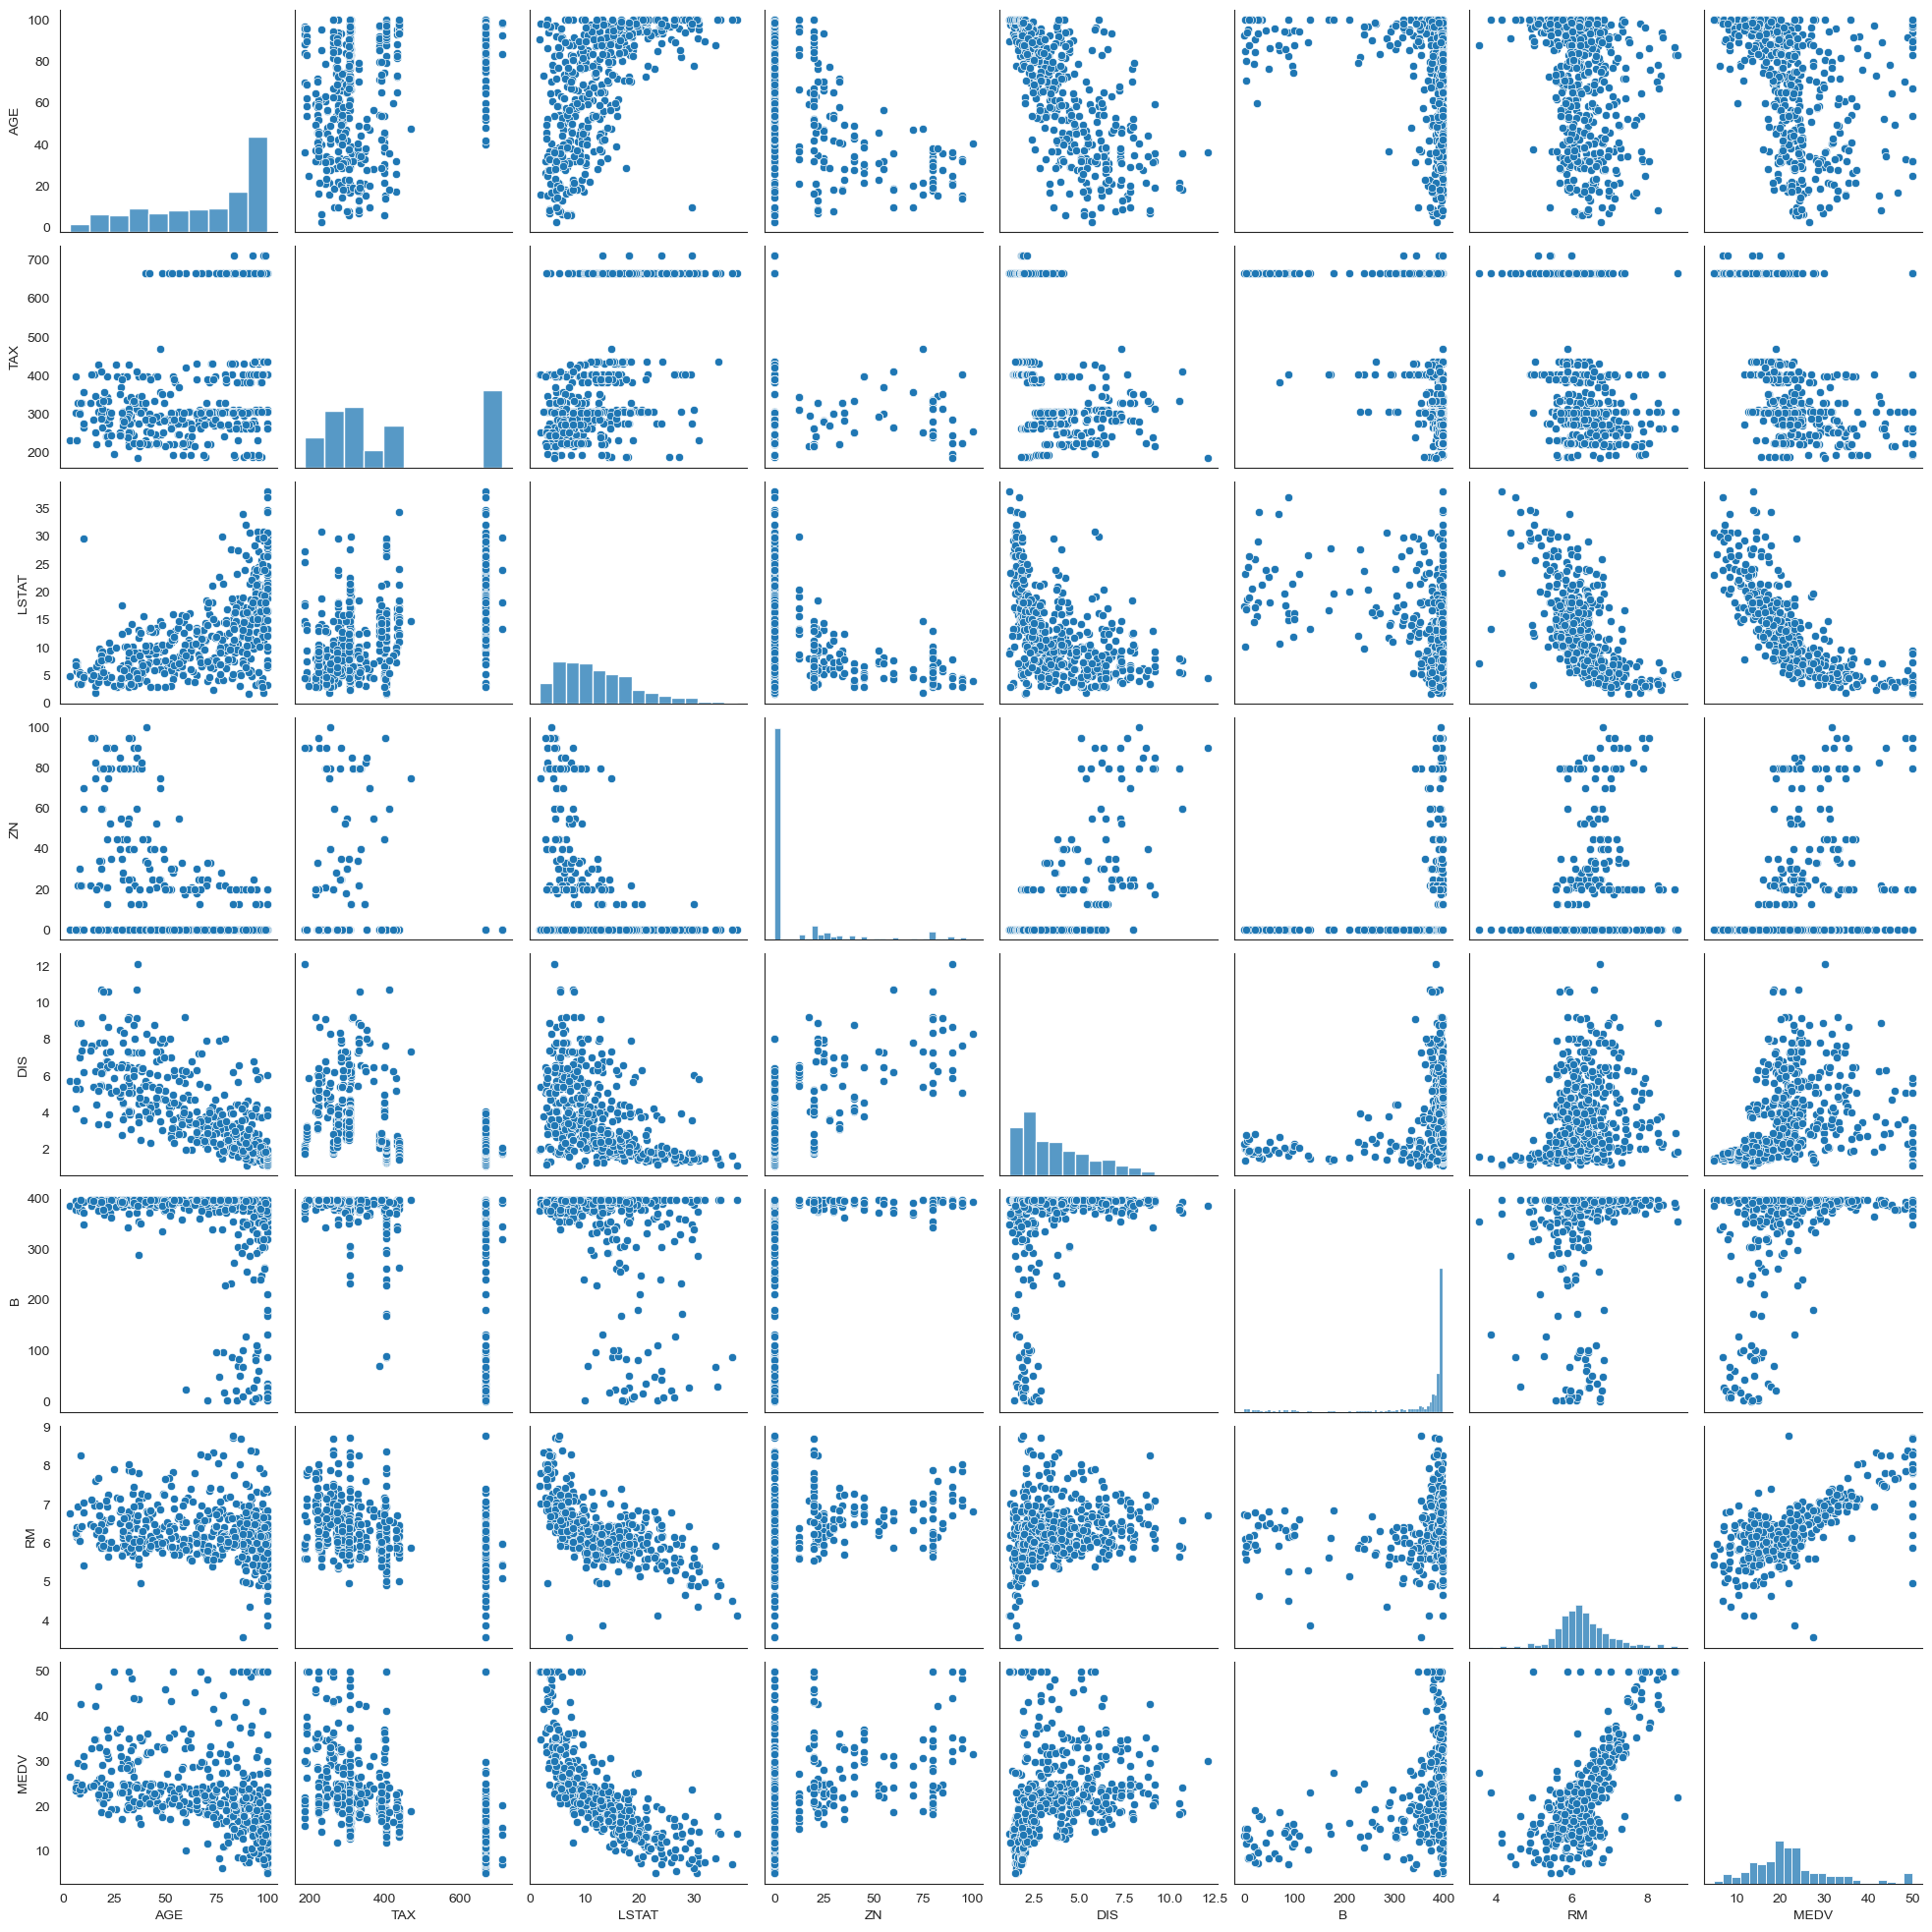

In [44]:
sns.pairplot(DF[['AGE','TAX','LSTAT','ZN','DIS','B','RM','MEDV']])
plt.show()

Here are the columns we are working with

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - lower status of the population (%)
- MEDV - Median value of owner-occupied homes in $1000's

In [60]:
# Let's look at some of the data and do further analysis
# Let's look at: Crime Rate, Age of home owners, Property Tax, Distance to five Boston Employment Centers,
# Lower Status of the population, Median Value of the homes, and Charles River factor is 1 (tract bounds river)
# Let's see if there are any correlation we can find in these variables

preview = ['AGE','B','CRIM','DIS','LSTAT','TAX','MEDV']

DF[preview].describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
B,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000


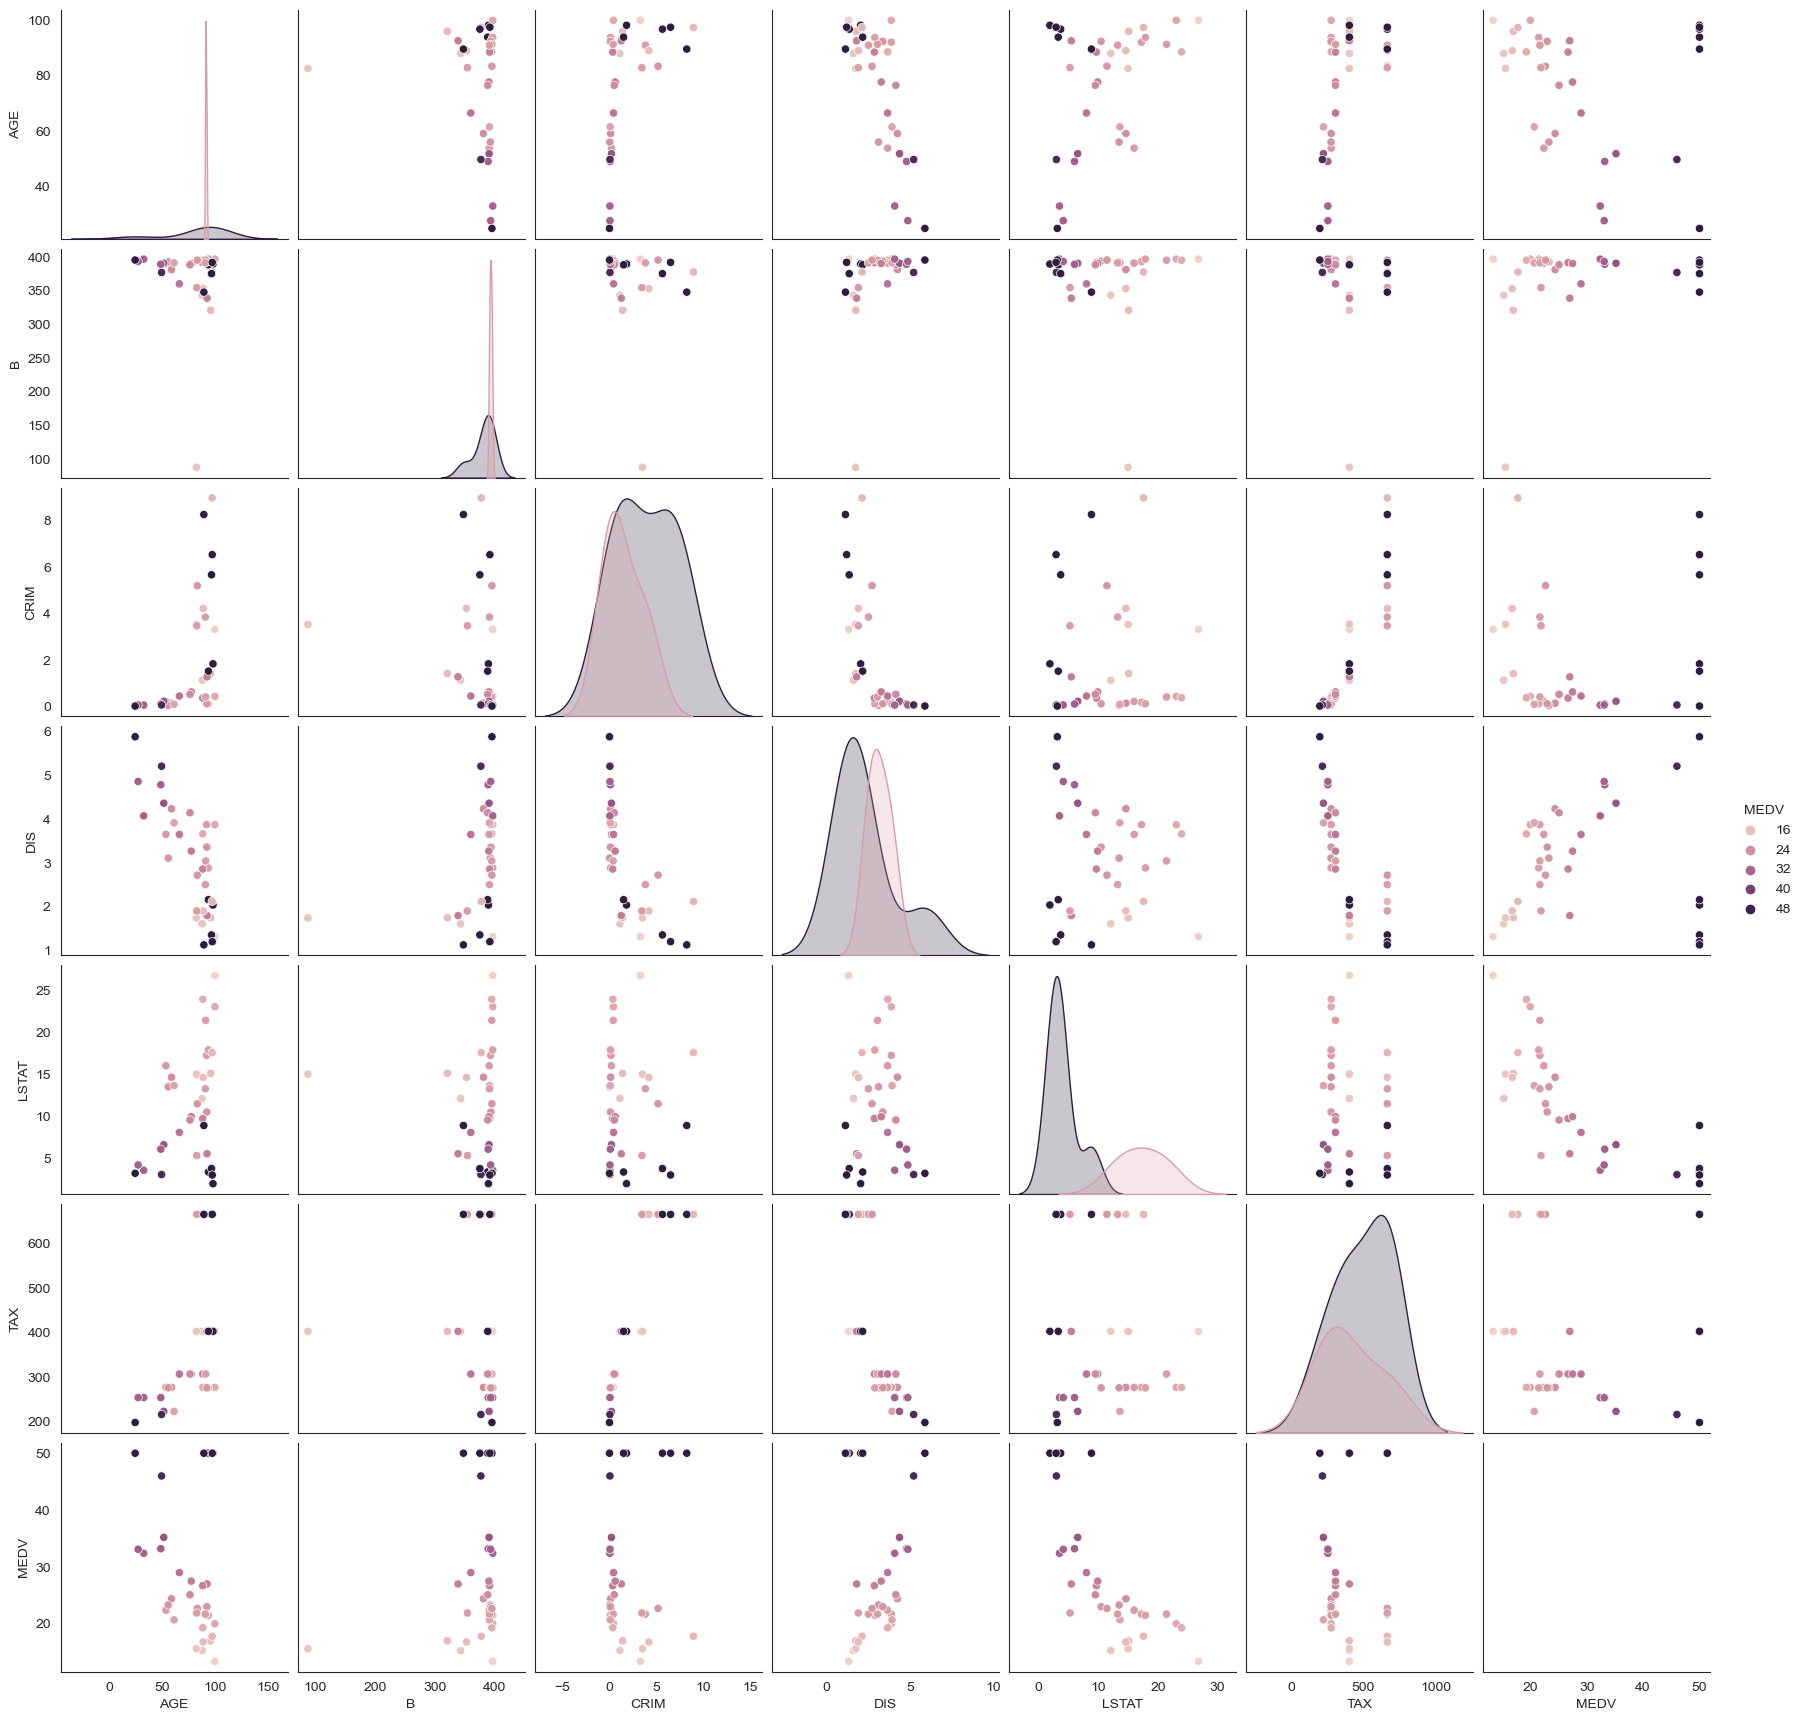

In [61]:
# Let's plot them based on the value of the MEDV. Let's look at the pattern of data from the view of Median Home Value
sns.pairplot(DF[DF['CHAS'] == 1], vars = preview, diag_kind = 'kde', hue='MEDV')
#plt.suptitle('Pair Plot of Boston Housing Data', size = 28)
plt.show()

### Now let's do a heatmap and do some pairwise correlation

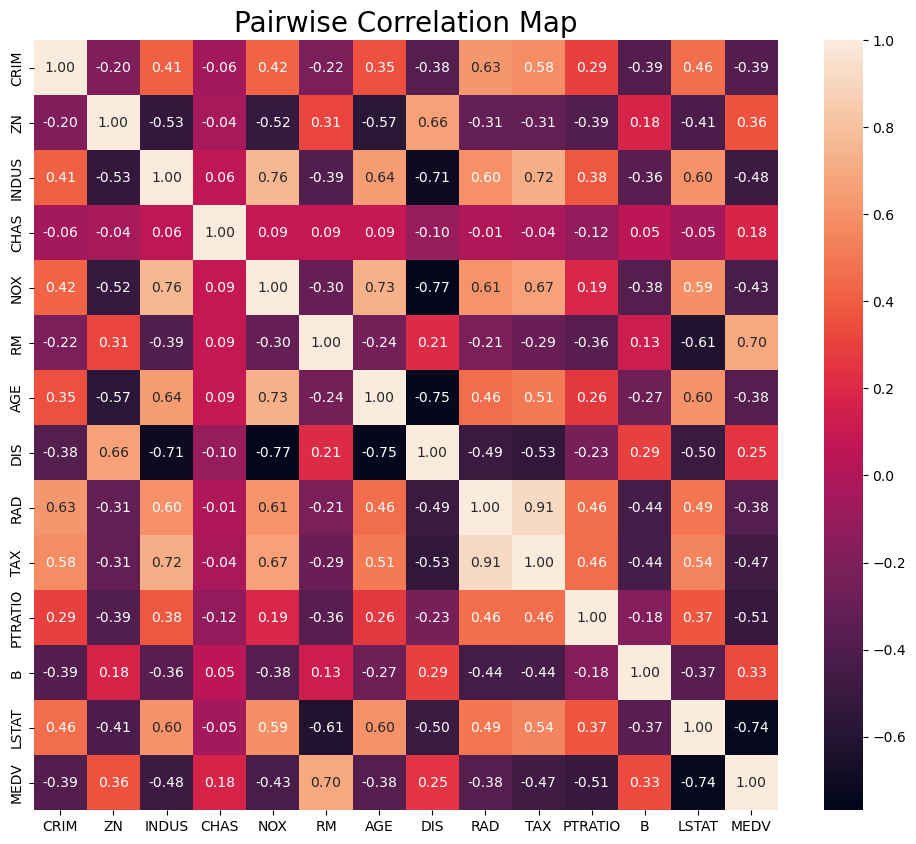

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(DF.corr(),annot=True,fmt='.2f')
plt.title('Pairwise Correlation Map', size = 20)
plt.show()

This shows that TAX and RAD are highly correlated at 0.91
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000

We also find that B and CHAS have very low correlation with the other columns

### Clustermap Table

Clustermap table shows not only all correlation between variables, but also group (cluster) relationships.

Text(0.5, 1.0, 'Cluster Map')

<Figure size 400x400 with 0 Axes>

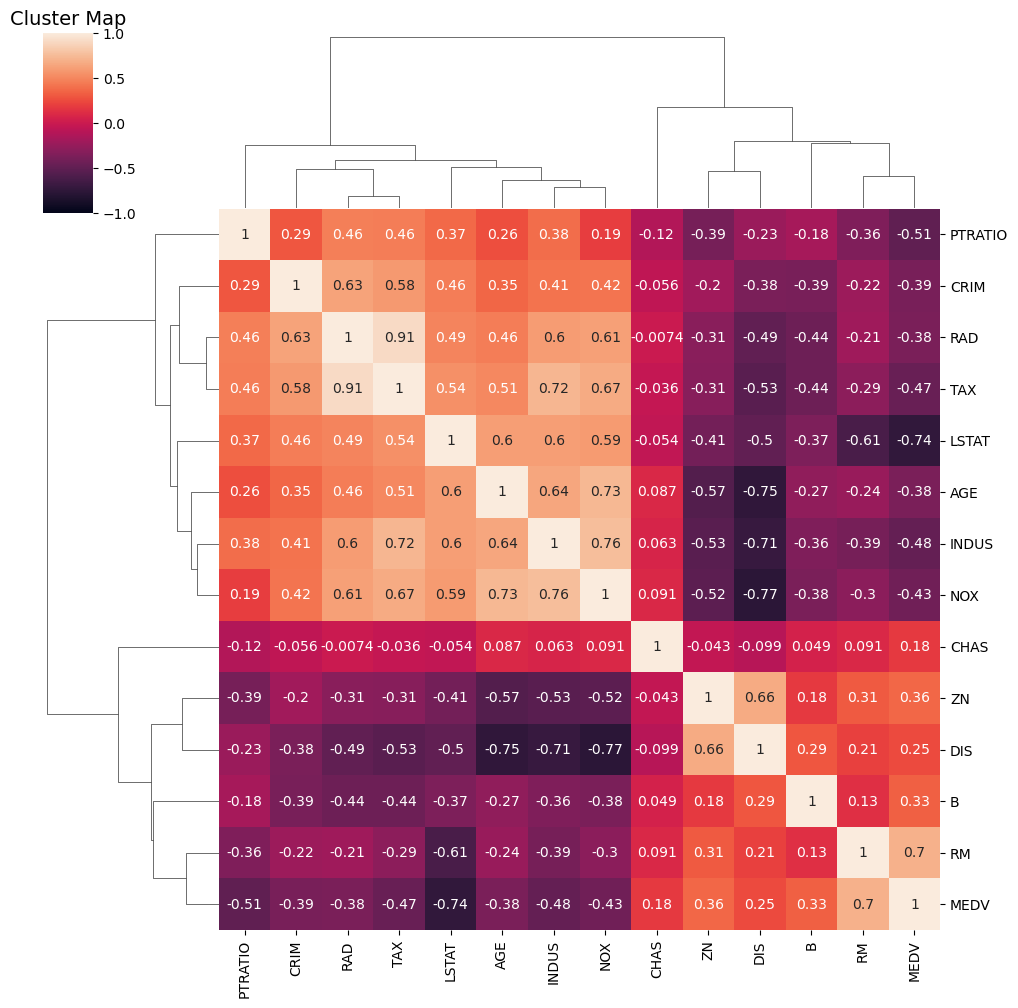

In [19]:
plt.figure(figsize = (4, 4))
clustermap = sns.clustermap(DF.corr(), vmin = -1, vmax = 1, annot = True)
plt.title('Cluster Map', size = 14)

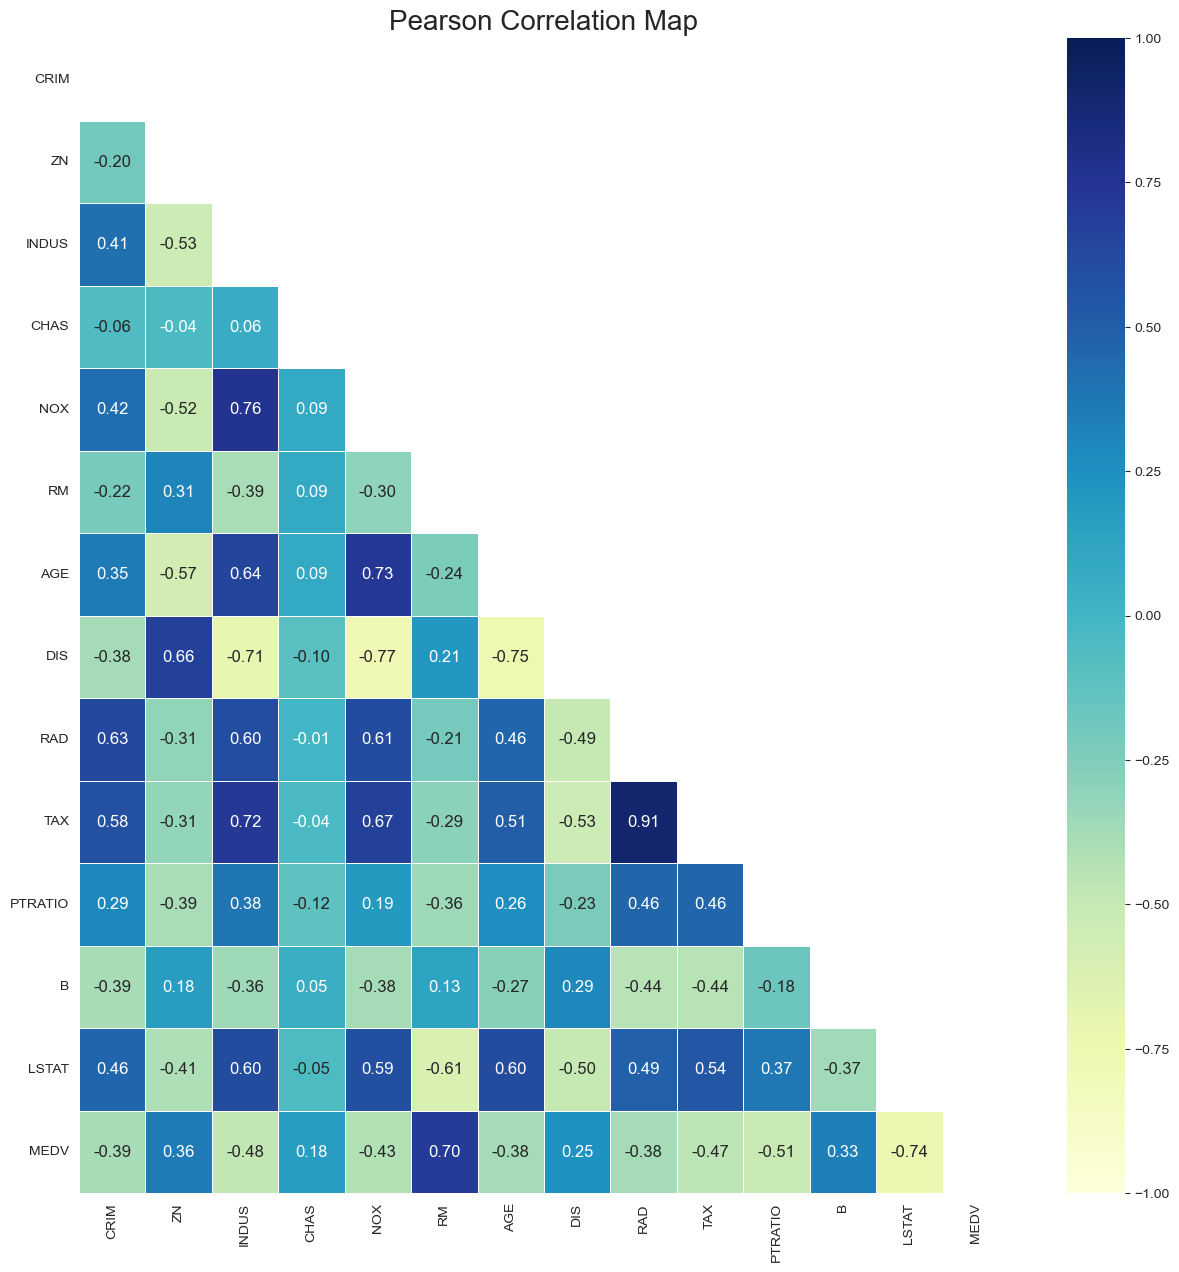

In [20]:
sns.set_style("white")
matrix = np.triu(DF.corr(method="pearson"))
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(DF.corr(),xticklabels=col_names, yticklabels=col_names,annot= True,fmt = ".2f",ax=ax,
            vmin = -1, vmax = 1, mask = matrix, cmap = "YlGnBu",
            linewidth = 0.4,linecolor = "white",annot_kws={"size": 12})
plt.xticks(rotation=90,size=10)
plt.yticks(rotation=0,size=10)
plt.title('Pearson Correlation Map', size = 20)
plt.show()

### Summary based on Exploratory Data Analysis (EDA) 

- There's a strong negatively correlation (R^2 = -0.74) between the LSTAT (%lower status of the population) and MEDV (Median value of owner-occupied homes in $1000's). 

- Few features that strongly negatively correlated (> 0.75) with DIS (weighted distances to five Boston employment centres) are AGE (proportion of owner-occupied units built prior to 1940), NOX (nitric oxides concentration (parts per 10 million)) and INDUS (proportion of non-retail business acres per town).